# Statistics 1: PDF, CDF, iCDF, inverse-transform sampling

In this notebook, we will discuss the probability density function (PDF), cumulative distribution function (CDF), inverse cumulative distribution function (iCDF), and inverse-transform sampling.

I will normal distribution as an example to explain these concepts.

## Probability Density Function (PDF)

The probability density function (PDF) of a continuous random variable is a function that describes the relative likelihood for this random variable to take on a given value. 

The PDF of a normal distribution is given by the formula:

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

where $\mu$ is the mean of the distribution and $\sigma$ is the standard deviation.

## Cumulative Distribution Function (CDF)

The cumulative distribution function (CDF) of a random variable is a function that describes the probability that the random variable will be less than or equal to a given value.

The CDF of a normal distribution is given by the formula:

$$
F(x) = \int_{-\infty}^{x} f(x') dx'
$$

where $\text{erf}$ is the error function.

## Inverse Cumulative Distribution Function (iCDF)

The inverse cumulative distribution function (iCDF) is the inverse of the CDF. It takes a CDF value and returns the corresponding value of the random variable.

I will use interpolation to approximate the iCDF of the normal distribution.


In [1]:
# call all the important packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d

In [2]:
# PDF
def pdf(x, mu=0, sigma=1):
    """
    Function to calculate the probability density function of a normal distribution

    Parameters
    ----------
    x : float or array-like
        The value(s) at which to calculate the PDF
    mu : float
        The mean of the normal distribution
        default: 0
    sigma : float
        The standard deviation of the normal distribution
        default: 1

    Returns
    -------
    float or array-like
        The value of the probability density function at x
    """

    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2/(2*sigma**2))

# CDF
def cdf(x, mu=0, sigma=1):
    """Function to calculate the cumulative distribution function of a normal distribution

    Parameters
    ----------
    x : float or array-like
        The value(s) at which to calculate the CDF
    mu : float
        The mean of the normal distribution
        default: 0
    sigma : float
        The standard deviation of the normal distribution
        default: 1

    Returns
    -------
    float or array-like
        The value of the cumulative distribution function at x
    """

    cdf_arr = []
    for val in x:
        integral, _ = quad(pdf, -np.inf, val, args=(mu, sigma))
        cdf_arr.append(integral)
    return np.array(cdf_arr)

#  CDF as interpolation
x = np.linspace(-5, 5, 1000)
y = cdf(x)
cdf_interp = interp1d(x, y, fill_value="extrapolate")

# iCDF as interpolation
icdf_interp = interp1d(y, x, fill_value="extrapolate")

### Plots

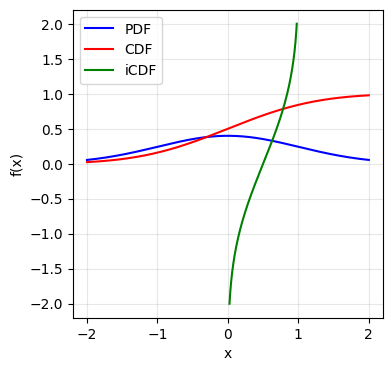

In [3]:
# plot the PDF, CDF and iCDF
x = np.linspace(-2, 2, 1000)
plt.figure(figsize=(4, 4))
plt.plot(x, pdf(x), label='PDF', color='blue')
plt.plot(x, cdf(x), label='CDF', color='red')
plt.plot(cdf(x), icdf_interp(cdf(x)), label='iCDF', color='green')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Sampling Techniques

### Rejection Sampling

This is a simple sampling technique that can be used to sample from any distribution. The idea is to sample from a simple distribution that is easy to sample from, and then reject samples that are not from the desired distribution. The algorithm is as follows:

1. Sample a value x from a simple distribution (e.g. uniform distribution).
2. Sample a value y from the desired distribution. Note that this sample between certain possible range [ymin, ymax].
3. If y is less than the value of the desired distribution at x, accept x. Otherwise, reject x.
4. Repeat steps 1-3 until you have the desired number of samples.

### Inverse Transform Sampling

This is another simple sampling technique that can be used to sample from any distribution. The idea is to sample from a uniform distribution and then use the inverse of the cumulative distribution function (CDF) of the desired distribution to transform the samples to the desired distribution. The algorithm is as follows:

1. Sample a value u from a uniform distribution.
2. Calculate the value of the inverse CDF of the desired distribution at u.
3. Repeat steps 1-2 until you have the desired number of samples.


In [4]:
def rejection_sampling(size, pdf, xmin, xmax):
    """
    Function to generate random samples from a normal distribution using the rejection sampling method

    Parameters
    ----------
    size : int
        The number of samples to generate
    pdf : function
        The probability density function of the normal distribution
    xmin : float
        The minimum value of the range to sample from
    xmax : float
        The maximum value of the range to sample from

    Returns
    -------
    array-like
        The generated samples
    """

    x = np.linspace(xmin, xmax, 1000)
    y = pdf(x)
    ymax = np.max(y) # Maximum value of the pdf
    x_samples = []
    while len(x_samples) < size:
        x_try = np.random.uniform(xmin, xmax, size=size)
        pdf_y_try = pdf(x_try)
        # this is for comparing with the pdf value at x_try, will be used to accept or reject the sample
        y_try = np.random.uniform(0, ymax, size=size) 
    
        # Update the maximum value of the pdf
        ymax = max(ymax, np.max(pdf_y_try))  
        
        # applying condition to accept the sample
        accepted = list(x_try[y_try < pdf_y_try]) 
        # add to the list
        x_samples += accepted

    return np.array(x_samples[:size]) # this also trims to the correct size


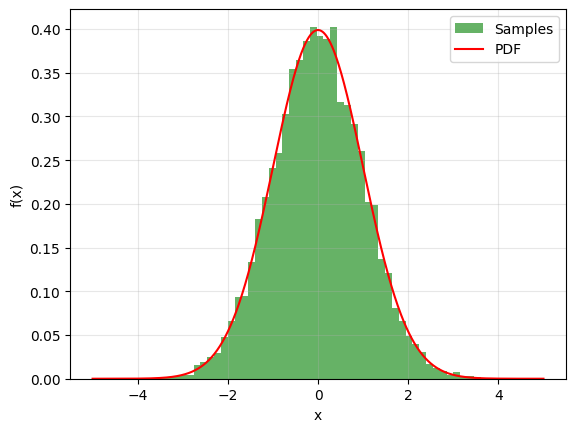

In [5]:
# sample from the normal distribution using rejection sampling
x_values = rejection_sampling(size=10000, pdf=pdf, xmin=-5, xmax=5)

# plots
x = np.linspace(-5, 5, 1000)
plt.hist(x_values, bins=50, density=True, alpha=0.6, color='g', label='Samples')
plt.plot(x, pdf(x), color='r', label='PDF')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [6]:
# inverse transform sampling
def inverse_transform_sampling(size, icdf):
    """
    Function to generate random samples from a normal distribution using the inverse transform sampling method

    Parameters
    ----------
    size : int
        The number of samples to generate
    icdf : function
        The inverse cumulative distribution function of the normal distribution

    Returns
    -------
    array-like
        The generated samples
    """

    u = np.random.uniform(0, 1, size=size)
    return icdf(u)

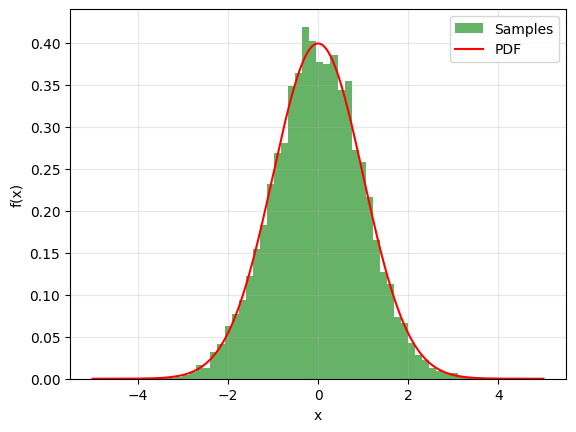

In [7]:
# sample from the normal distribution using inverse transform sampling
x_values = inverse_transform_sampling(size=10000, icdf=icdf_interp)

x = np.linspace(-5, 5, 1000)
plt.hist(x_values, bins=50, density=True, alpha=0.6, color='g', label='Samples')
plt.plot(x, pdf(x), color='r', label='PDF')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Speed comparison

In [8]:
%timeit rejection_sampling(size=1000000, pdf=pdf, xmin=-5, xmax=5)

128 ms ± 1.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
%timeit inverse_transform_sampling(size=1000000, icdf=icdf_interp)

80.6 ms ± 3.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
128/80.6

1.588089330024814

* there is ~1.6x speedup in inverse-transform sampling compared to rejection sampling.

* you can see more speed up if you optimize the interpolation function. Optimized interpolation function is used in `ler`.

* An example is given below. This is done with more advanced concept of python. I will tell you about this later, but this topic is not in the scope of your project.

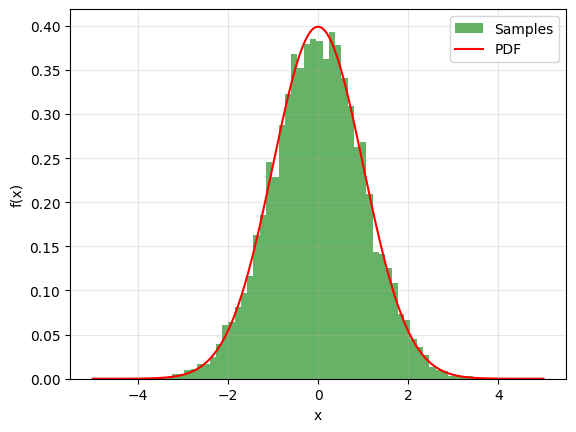

In [11]:
from ler.utils import inverse_transform_sampler # you might need to install ler
from numba import njit

x = np.linspace(-5, 5, 1000)
cdf_values = cdf(x)

# define a lambda function to call the inverse_transform_sampler function with the cdf_values and x
inverse_transform_sampler_ler = njit( lambda size: inverse_transform_sampler(size, cdf_values, x) )
x_values = inverse_transform_sampler_ler(10000)


x = np.linspace(-5, 5, 1000)
plt.hist(x_values, bins=50, density=True, alpha=0.6, color='g', label='Samples')
plt.plot(x, pdf(x), color='r', label='PDF')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [12]:
# checking speed
%timeit inverse_transform_sampler_ler(size=1000000);

58.3 ms ± 142 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


* There is indeed the speedup in here